In [67]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [62]:
def M(h, beta):
    k = beta * 1
    nominator = np.exp(k) * np.sinh(beta* h)
    denominator = (np.exp(2*k) * np.sinh(beta * h)**2 + np.exp(-2*k))**(1/2)
    return nominator / denominator

In [65]:
x = np.linspace(-4, 4, 1000)
beta = [0.25, 1, 1.5]
y = []
for i in range(len(beta)):
    y.append(M(x, beta[i]))

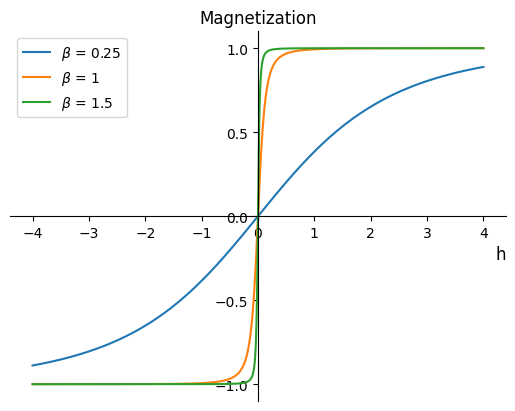

In [66]:
fig, ax = plt.subplots()

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

for i in range(len(beta)):
    ax.plot(x, y[i], label=rf'$\beta$ = {beta[i]}')

ax.set_title("Magnetization")
ax.set_xlabel("h", loc="right", fontsize=12)

ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.legend()
plt.savefig("one_d_ising")

In [115]:
inv_T = []
T = []
E = []
M = []
C_v = []
Chi = []

with open("output1.csv", newline='') as csvfile:
    read = csv.reader(csvfile, delimiter=',')
    for row in read:
        inv_T.append(row[0])
        T.append(row[1])
        E.append(row[2])
        M.append(row[3])
        C_v.append(row[4])
        Chi.append(row[5])

In [116]:
inv_T = np.array(inv_T[1:], dtype=float)
T = np.array(T[1:], dtype=float)
E = np.array(E[1:], dtype=float)
M = np.array(M[1:], dtype=float)
C_v = np.array(C_v[1:], dtype=float)
Chi = np.array(Chi[1:], dtype=float)

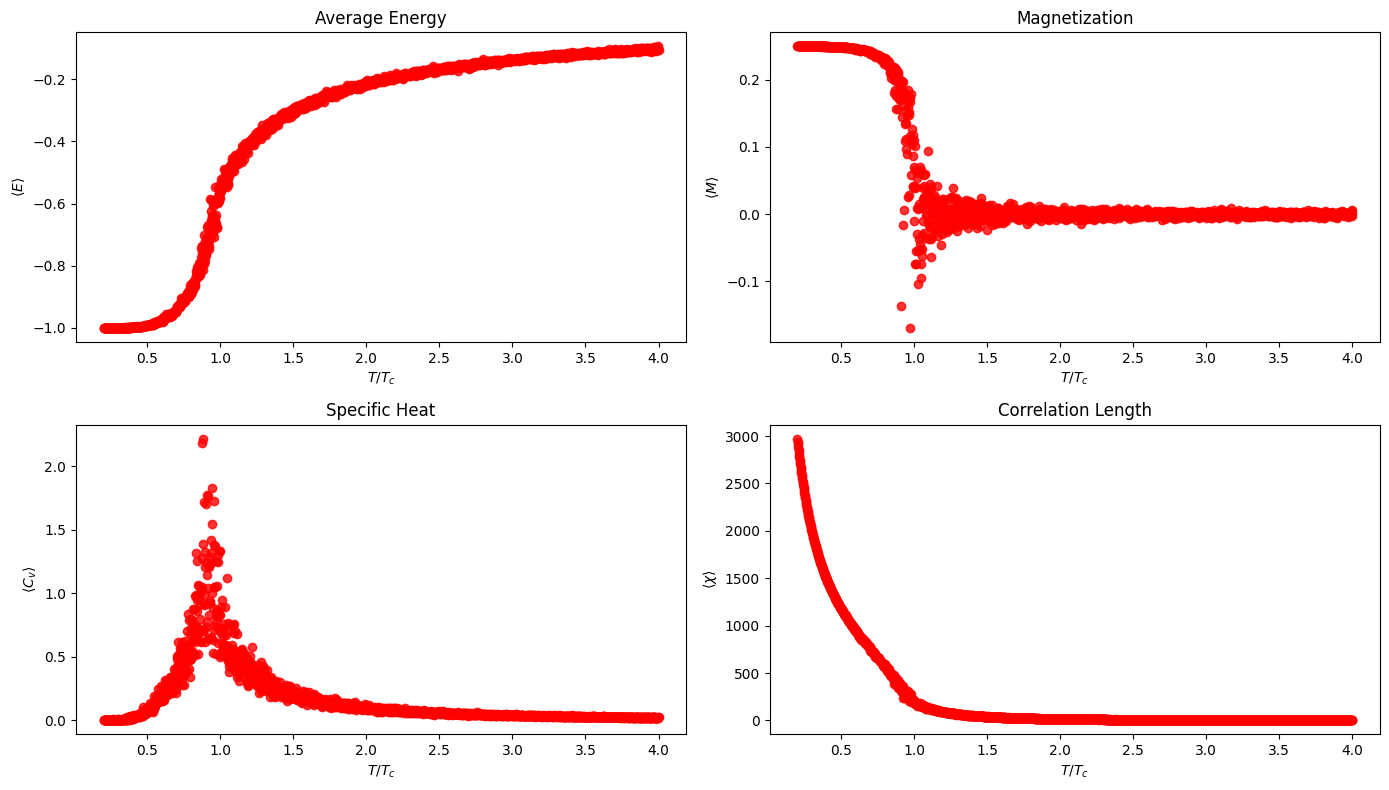

In [117]:
T_c = 2.5

fig, ax = plt.subplots(2, 2, figsize=(14, 8))
ax[0][0].scatter(T/T_c, E, color='r', alpha=0.8)
ax[0][0].set_ylabel(r"$\left< E \right>$")
ax[0][0].set_xlabel(r"$ T/T_{c} $")
ax[0][0].set_title("Average Energy")

ax[0][1].scatter(T/T_c, M, color='r', alpha=0.8)
ax[0][1].set_ylabel(r"$\left< M \right>$")
ax[0][1].set_xlabel(r"$ T/T_{c} $")
ax[0][1].set_title("Magnetization")

ax[1][0].scatter(T/T_c, C_v, color='r', alpha=0.8)
ax[1][0].set_ylabel(r"$\left< C_{v} \right>$")
ax[1][0].set_xlabel(r"$ T/T_{c} $")
ax[1][0].set_title("Specific Heat")

ax[1][1].scatter(T/T_c, Chi, color='r', alpha=0.8)
ax[1][1].set_ylabel(r"$\left< \chi \right>$")
ax[1][1].set_xlabel(r"$ T/T_{c} $")
ax[1][1].set_title("Correlation Length")

fig.tight_layout()
plt.savefig("two_d_ising")